In [4]:
%matplotlib inline

In [5]:
import pandas as pd

import requests
import json
import re
import matplotlib.pyplot as plt
import pandas
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Google developer API key
from config import gkey

In [6]:
file = "gun_violence.csv"

In [7]:
data = pd.read_csv(file,low_memory =False)
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,274168,1/1/2015,Oklahoma,Tulsa,4840 South Memorial Dr,0,2,http://www.gunviolencearchive.org/incident/274168,http://www.tulsaworld.com/news/crimewatch/thre...,False,...,0::27||1::26,0::Adult 18+||1::Adult 18+,0::Female||1::Male,"2::Steven Desean ""Steezo"" Courtney",NaN,0::Injured||1::Injured||2::Unharmed,0::Victim||1::Victim||2::Subject-Suspect,http://www.tulsaworld.com/news/crimewatch/thre...,75.0,25.0
1,276211,1/1/2015,Louisiana,Labadieville,NaN,1,0,http://www.gunviolencearchive.org/incident/276211,http://www.wafb.com/story/27765450/investigato...,False,...,0::63,0::Adult 18+,0::Male,"0::Gordon Jones, Senior",NaN,0::Killed,0::Victim,http://www.wafb.com/story/27765450/investigato...,51.0,17.0
2,272302,1/1/2015,Mississippi,Hattiesburg,Nugget Court,0,0,http://www.gunviolencearchive.org/incident/272302,http://www.wdam.com/story/27743511/2-hattiesbu...,False,...,0::26,0::Adult 18+,0::Male,0::Terry Turner,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wdam.com/story/27743511/2-hattiesbu...,102.0,45.0
3,272482,1/1/2015,Alabama,Bessemer,Bessemer Superhighway and Avenue P,0,2,http://www.gunviolencearchive.org/incident/272482,http://www.myfoxal.com/story/27742512/police-i...,False,...,NaN,NaN,0::Male||1::Male,NaN,NaN,0::Injured||1::Injured,0::Victim||1::Victim,http://www.myfoxal.com/story/27742512/police-i...,57.0,19.0
4,272487,1/1/2015,Illinois,Chicago,2200 block of North Narragansett Avenue,0,1,http://www.gunviolencearchive.org/incident/272487,http://www.chicagotribune.com/news/local/break...,False,...,NaN,NaN,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.chicagotribune.com/news/local/break...,3.0,2.0


In [8]:
city = data[["city_or_county", "state", "incident_id"]]

In [9]:
city.head()

,city_or_county,state,incident_id
0,Tulsa,Oklahoma,274168
1,Labadieville,Louisiana,276211
2,Hattiesburg,Mississippi,272302
3,Bessemer,Alabama,272482
4,Chicago,Illinois,272487


In [10]:
##group_city = city.groupby(["city_or_county"])

#group_city = city.groupby(["city_or_county", "state"])["incident_id"].count()

group_city = city.groupby(["city_or_county", "state"])["incident_id"].size().sort_values(ascending=False) \
  .reset_index(name='count of violence')
##group_city_count = group_city.count()

#group_city.to_csv("top100cityname.csv")

In [11]:
target_city =group_city["city_or_county"] +", " + group_city["state"]
#print(f'{target_city}')

target_city ='"' + target_city + '"'
target_city[0:5]

0                   "Chicago, Illinois"
1                 "Baltimore, Maryland"
2    "Washington, District of Columbia"
3              "New Orleans, Louisiana"
4               "Jacksonville, Florida"
dtype: object

In [12]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

##cities = group_city["city_or_county"]

city100 = target_city[0:100]

county = ["M"]*100
    
try:
    
    for i in range(len(city100)):
    
        params = {"address": city100[i], "key": gkey}
        response = requests.get(base_url, params=params).json()
        county[i] = response["results"][0]["address_components"][1]["long_name"]
except:
    
    print("Small Error")
county


['Cook County',
 'Maryland',
 'District of Columbia',
 'Orleans Parish',
 'Duval County',
 'Shelby County',
 'Missouri',
 'Milwaukee County',
 'Philadelphia County',
 'Harris County',
 'Marion County',
 'Cuyahoga County',
 'Suffolk County',
 'Bexar County',
 'Kings County',
 'Wayne County',
 'Jefferson County',
 'Clark County',
 'Davidson County',
 'Fulton County',
 'Tulsa County',
 '1, Charlotte',
 'Franklin County',
 'Jackson County',
 'Dallas County',
 'Peoria City Township',
 'Jefferson County',
 'Hamilton County',
 'Erie County',
 'Virginia',
 'Allegheny County',
 'Multnomah County',
 'Fresno County',
 'Orange County',
 'Alameda County',
 'Rockford Township',
 'Los Angeles County',
 'Maricopa County',
 'Big Rock Township',
 'Chicago',
 'Jefferson Township',
 'Hinds County',
 '6',
 'Oklahoma County',
 'Parish Governing Authority District 12',
 'Bronx County',
 'Miami-Dade County',
 'Sedgwick County',
 'Hampden County',
 'El Paso County',
 'Bernalillo County',
 'Lucas County',
 'Cha

In [13]:
#fixing few county names , as there are anamoly on googleapi data
county[0] = "Cook County"
county[1] = "Baltimore"
county[2] = "Washington"
county[6] = "St. Louis"
county[21] = "Mecklenburg County"
county[25] = "Peoria County"
county[29] = "Richmond"
county[35] = "Winnebago County"
county[38] = "Pulaski County"
county[39] = "Douglas County"
county[40] = "Montgomery County"
county[42] = "East Baton Rouge Parish"
county[44] = "Caddo Parish"
county[48] = "Hampden County"
county[53] = "Mercer County"
county[57] = "Cook County"
county[68] = "Norfolk"
county[74] = "Allen County"
county[76] = "Newport News"
county[80] = "Lake County"
county[84] = "Anchorage"

In [14]:
group100 = group_city[0:100]
group100.head()

,city_or_county,state,count of violence
0,Chicago,Illinois,8256
1,Baltimore,Maryland,2943
2,Washington,District of Columbia,2173
3,New Orleans,Louisiana,2167
4,Jacksonville,Florida,1922


In [15]:
# creating copy of the dataframe 
top_100_county = group100.copy() 
top_100_county["county"] = county
top_100_county = top_100_county.rename(columns={"city_or_county":"city"})
top_100_county.head(20)

,city,state,count of violence,county
0,Chicago,Illinois,8256,Cook County
1,Baltimore,Maryland,2943,Baltimore
2,Washington,District of Columbia,2173,Washington
3,New Orleans,Louisiana,2167,Orleans Parish
4,Jacksonville,Florida,1922,Duval County
5,Memphis,Tennessee,1861,Shelby County
6,Saint Louis,Missouri,1834,St. Louis
7,Milwaukee,Wisconsin,1794,Milwaukee County
8,Philadelphia,Pennsylvania,1754,Philadelphia County
9,Houston,Texas,1711,Harris County


In [16]:
top_100_county["county"] = top_100_county["county"].apply(lambda x: re.sub(' County','',x))
top_100_county["county"] = top_100_county["county"].apply(lambda x: re.sub(' Parish','',x))
top_100_county = top_100_county[["state", "city", "county", "count of violence"]]
top_100_county.head()

,state,city,county,count of violence
0,Illinois,Chicago,Cook,8256
1,Maryland,Baltimore,Baltimore,2943
2,District of Columbia,Washington,Washington,2173
3,Louisiana,New Orleans,Orleans,2167
4,Florida,Jacksonville,Duval,1922


In [17]:
income_data = "percapita_income.csv"
income_data = pd.read_csv(income_data)
income_data = income_data.rename(columns={"State":"state", "County": "county"})
income_data.head()

,state,county,2015,2016,2017
0,Alabama,Autauga,38591.0,39509.0,40484.0
1,Alabama,Baldwin,41412.0,43004.0,44079.0
2,Alabama,Barbour,31509.0,31750.0,33453.0
3,Alabama,Bibb,29048.0,28989.0,30022.0
4,Alabama,Blount,31987.0,32261.0,33707.0


In [18]:
#income_data['avg income'] = income_data[['2015', '2016', '2017']].mean()
#income_data = income_data.astype({"2015":'int64', "2016":'int64',"2017":'int64' })  
income_data.dtypes

#a= income_data["2015"][0] + income_data["2016"][0]
#a
#income_data

state      object
county     object
2015      float64
2016      float64
2017      float64
dtype: object

In [19]:
#income_data['sum_years'] = income_data[['2015', '2016', '2017']].sum()
#income_data

income_data['mean_salary'] =round(income_data.mean(axis = 1, skipna = True),2)
income_data.head()

,state,county,2015,2016,2017,mean_salary
0,Alabama,Autauga,38591.0,39509.0,40484.0,39528.00
1,Alabama,Baldwin,41412.0,43004.0,44079.0,42831.67
2,Alabama,Barbour,31509.0,31750.0,33453.0,32237.33
3,Alabama,Bibb,29048.0,28989.0,30022.0,29353.00
4,Alabama,Blount,31987.0,32261.0,33707.0,32651.67


In [20]:
income_county = pd.merge(top_100_county, income_data , how='inner', on=['state', 'county'])
income_county =income_county[income_county.city != "Chicago (Englewood)"]
income_county.sort_values(by=['count of violence', 'mean_salary'], ascending=False)
income_county.head()

,state,city,county,count of violence,2015,2016,2017,mean_salary
0,Illinois,Chicago,Cook,8256,56470.0,57285.0,59238.0,57664.33
2,Maryland,Baltimore,Baltimore,2943,55215.0,56829.0,59130.0,57058.00
3,District of Columbia,Washington,Washington,2173,75731.0,77506.0,79989.0,77742.00
4,Louisiana,New Orleans,Orleans,2167,47416.0,47818.0,49222.0,48152.00
5,Florida,Jacksonville,Duval,1922,42106.0,42617.0,44347.0,43023.33


In [21]:
income_county_scatter_df = income_county[["county","count of violence","mean_salary"]]
income_county_scatter_df.head()

,county,count of violence,mean_salary
0,Cook,8256,57664.33
2,Baltimore,2943,57058.00
3,Washington,2173,77742.00
4,Orleans,2167,48152.00
5,Duval,1922,43023.33


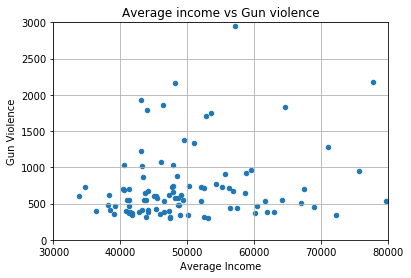

In [48]:
income_county_scatter_df.plot(kind="scatter", x="mean_salary", y="count of violence", grid=True,
              title="Average income vs Gun violence")

plt.xlabel("Average Income")
plt.ylabel("Gun Violence")
plt.xlim(30000, 80000)
plt.ylim(0, 3000)
plt.savefig("scatter.png")
plt.show()

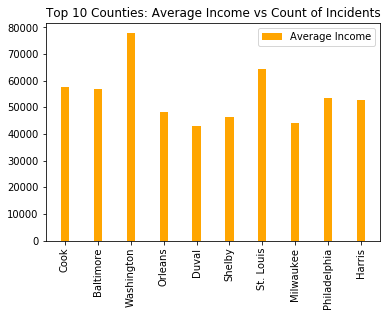

In [66]:
income_county_10_df = income_county_scatter_df.head(10)
x = np.arange(10)
tick_locations = [value for value in x]
plt.xticks(tick_locations, income_county_10_df['county'])
plt.xticks(x, income_county_10_df['county'], rotation='vertical')
bar_1 = plt.bar(x,income_county_10_df['mean_salary'], color = 'orange', width = 0.25)
plt.legend([bar_1], ['Average Income'])
plt.title("Top 10 Counties: Average Income vs Count of Incidents")
plt.savefig("top10income.png")
plt.show()

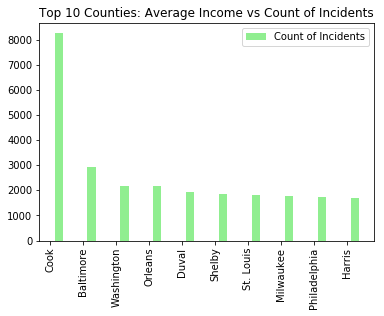

In [67]:
income_county_10_df = income_county_scatter_df.head(10)
x = np.arange(10)
tick_locations = [value for value in x]
plt.xticks(tick_locations, income_county_10_df['county'])
plt.xticks(x, income_county_10_df['county'], rotation='vertical')
bar_2 = plt.bar(x+0.25,income_county_10_df['count of violence'], color = 'lightgreen', width = 0.25)
plt.legend([bar_2], ['Count of Incidents'])
plt.title("Top 10 Counties: Average Income vs Count of Incidents")
plt.savefig("top10incidents.png")
plt.show()

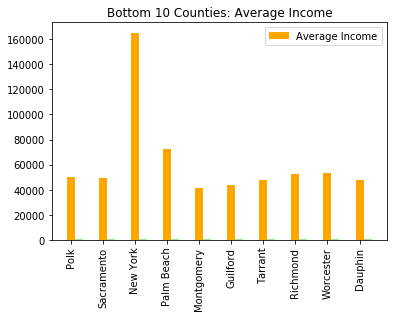

In [68]:
income_county_tail_df = income_county_scatter_df.tail(10)
income_county_tail_df
x = np.arange(10)
tick_locations = [value for value in x]
plt.xticks(tick_locations, income_county_tail_df ['county'])
plt.xticks(x, income_county_tail_df['county'], rotation='vertical')
bar_1 = plt.bar(x,income_county_tail_df ['mean_salary'], color = 'orange', width = 0.25)
bar_2 = plt.bar(x+0.25,income_county_tail_df ['count of violence'], color = 'lightgreen', width = 0.25)
plt.legend([bar_1], ['Average Income'])
plt.title("Bottom 10 Counties: Average Income")
plt.savefig("bottom10income.png")
plt.show()


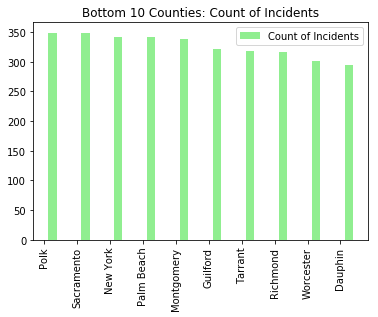

In [69]:
income_county_tail_df = income_county_scatter_df.tail(10)
income_county_tail_df
x = np.arange(10)
tick_locations = [value for value in x]
plt.xticks(tick_locations, income_county_tail_df ['county'])
plt.xticks(x, income_county_tail_df['county'], rotation='vertical')
bar_2 = plt.bar(x+0.25,income_county_tail_df ['count of violence'], color = 'lightgreen', width = 0.25)
plt.legend([bar_2], ['Count of Incidents'])
plt.title("Bottom 10 Counties: Count of Incidents")
plt.savefig("bottom10incidents.png")
plt.show()